In [1]:
import tensorflow as tf
#Checking the version
tf.__version__

'2.3.0'

In [2]:
#Import libraries
from tensorflow import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("D:/I/intern Assignment/Email Spam detection/messages.csv")

In [4]:
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [5]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [6]:
## Get the Dependent features
y=df['label']

In [7]:
y.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [8]:
#checing the Nan Values
X.isnull().values.any()

True

In [9]:
#Replacing  nan values with No_subject

df=df.fillna("No subject")

In [10]:
df.head(10)

subject  \
0            job posting - apple-iss research center   
1                                         No subject   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   
5  call for abstracts : optimality in syntactic t...   
6                m . a . in scandinavian linguistics   
7  call for papers : linguistics session of the m...   
8                    foreign language in commercials   
9  fulbright announcement : please post / dissemi...   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0  
5  content - length : 4437 call for papers is the...      0  
6  m . a . in scandinavian linguistics at the uni...      0  
7  call for papers linguistics session - - midwes...      0  
8  content - length : 1937 greetings ! i ' m wond...      0  
9  fulbright announcement : please post / dissemi...      0

In [11]:
messages=df.copy()

In [12]:
def regexp(df,col):
    # Replace email addresses with 'email'
    print("Replaceing email addresses with ►► 'email'......")
    df[col]=df[col].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
    print('\n')
    # Replace URLs with 'webaddress'
    print("Replacing URLS with ►►'webaddress'......")
    df[col]=df[col].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
    print('\n')
    # Replace money symbols with 'dollars'
    print("Replacing money symobls with►► 'dollars'......")
    df[col]=df[col].str.replace(r'£|\$', 'dollers')
    print('\n')
    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    print("Replacing 10 Digit phone Numbers with ►►'PhineNumber'")
    df[col]=df[col].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
    print('\n')
    # Replace numbers with 'numbr'
    print("Replacing Numbers with ►►'number'.......")
    df[col]=df[col].str.replace(r'\d+(\.\d+)?', 'numbr')
    print('\n')
    # Remove punctuation
    print("Removing Punctuation.....")
    df[col]=df[col].str.replace(r'[^\w\d\s]', ' ')
    print('\n')
    # Replace whitespace between terms with a single space
    print("Replacing whitespace with ►► 'Single Space'........")
    df[col]=df[col].str.replace(r'\s+', ' ')
    print('\n')
    # Remove leading and trailing whitespace
    print("Removing Leading and trailing whitespace....")
    df[col]=df[col].str.replace(r'^\s+|\s+?$', '')

In [13]:
regexp(messages,'subject')
regexp(messages,'message')

Replaceing email addresses with ►► 'email'......


Replacing URLS with ►►'webaddress'......


Replacing money symobls with►► 'dollars'......


Replacing 10 Digit phone Numbers with ►►'PhineNumber'


Replacing Numbers with ►►'number'.......


Removing Punctuation.....


Replacing whitespace with ►► 'Single Space'........


Removing Leading and trailing whitespace....
Replaceing email addresses with ►► 'email'......


Replacing URLS with ►►'webaddress'......


Replacing money symobls with►► 'dollars'......


Replacing 10 Digit phone Numbers with ►►'PhineNumber'


Replacing Numbers with ►►'number'.......


Removing Punctuation.....


Replacing whitespace with ►► 'Single Space'........


Removing Leading and trailing whitespace....


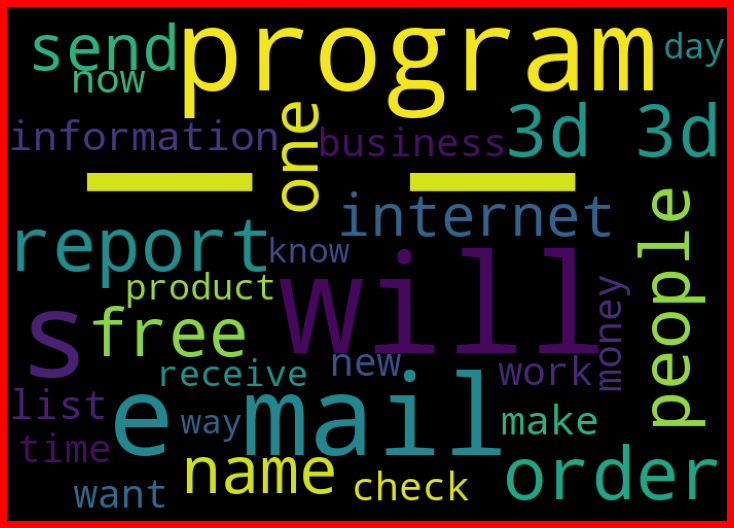

In [14]:
from wordcloud import WordCloud
spam=df['message'][df['label']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

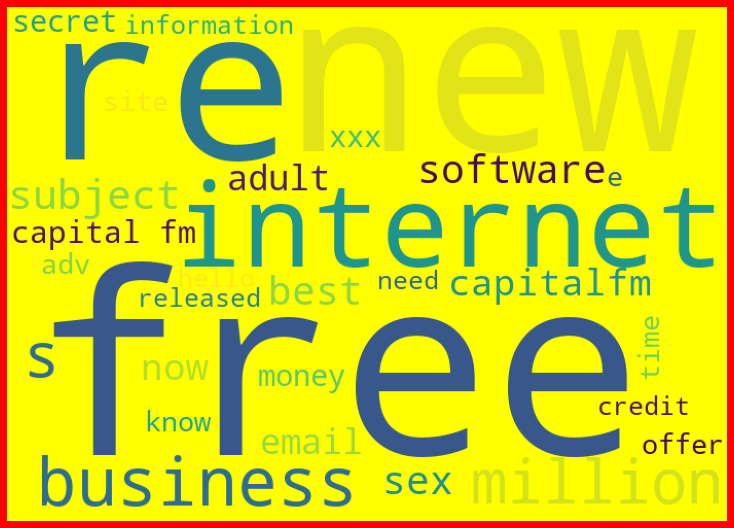

In [15]:
#Similary looking for the subject columns
spam=df['subject'][df['label']==1]
spam_cloud=WordCloud(width=700,height=500,background_color='yellow',max_words=30).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

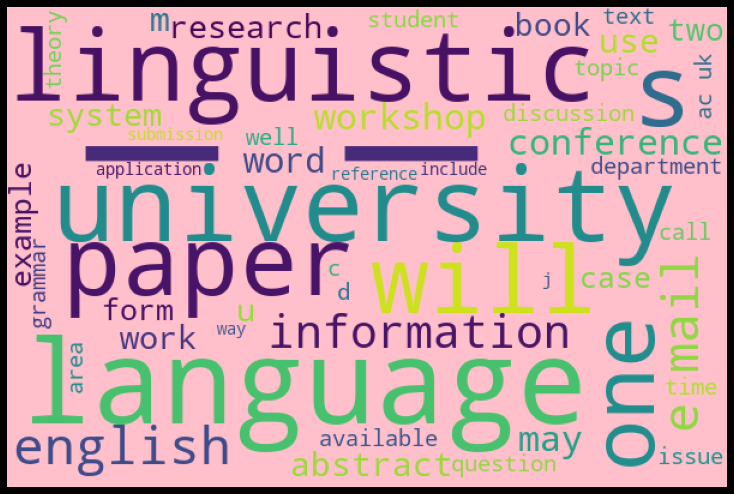

In [16]:
ham=df['message'][df['label']==0]
spam_cloud=WordCloud(width=600,height=400,background_color='pink',max_words=50).generate(' '.join(ham))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

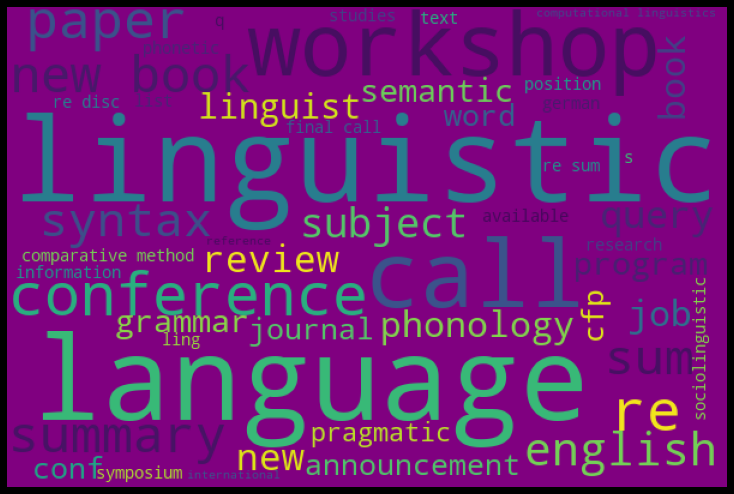

In [17]:
#Similary looking for the subject columns
ham=df['subject'][df['label']==0]
spam_cloud=WordCloud(width=600,height=400,background_color='purple',max_words=50).generate(' '.join(ham))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
#We can find that Email is Spam or Not from the Message so we are going to deal with the Message columns.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)#Dropping the unwanted column

In [19]:
corpus

['content length numbr appl iss research center us doller numbr million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpu base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least numbr numbr year relev work experi technic msc degre least numbr numbr year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri experi joi

In [20]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout


In [21]:
vocab_size=5000

In [22]:
onehot_repr=[one_hot(words,vocab_size)for words in corpus]
onehot_repr

[[1164,
  3697,
  1648,
  1094,
  1640,
  636,
  1590,
  4271,
  1939,
  1648,
  1228,
  1758,
  1474,
  1094,
  4574,
  2877,
  1387,
  42,
  3766,
  3516,
  934,
  4956,
  4620,
  4956,
  2824,
  4392,
  937,
  1227,
  2166,
  3492,
  636,
  1786,
  4574,
  3507,
  3077,
  1769,
  4100,
  4966,
  4901,
  2505,
  4452,
  4100,
  2173,
  964,
  3379,
  1139,
  2941,
  4121,
  3879,
  4975,
  4100,
  2173,
  4279,
  4100,
  2173,
  1954,
  937,
  4100,
  2173,
  4400,
  1228,
  937,
  2664,
  1905,
  2166,
  3492,
  636,
  1786,
  1786,
  3955,
  1343,
  101,
  4574,
  3507,
  3077,
  1769,
  4100,
  4423,
  1800,
  1247,
  4947,
  4452,
  4100,
  2173,
  1228,
  2504,
  3730,
  1195,
  2623,
  4684,
  964,
  1924,
  2502,
  3185,
  2505,
  4400,
  964,
  1228,
  4727,
  937,
  4280,
  4966,
  4804,
  3492,
  2380,
  3796,
  1648,
  1648,
  2175,
  1147,
  2182,
  2095,
  4168,
  4448,
  4030,
  3796,
  1648,
  1648,
  2175,
  1523,
  2154,
  1302,
  4386,
  26,
  4872,
  3077,
  4947,


In [23]:
sent_length=20
emeded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(emeded_docs)

[[3766 1903 2825 ... 1640 1858 1094]
 [4450 4035 4725 ... 4501 2563 4574]
 [1648 1648 1648 ... 1648 3811 1207]
 ...
 [1489 2509 2329 ... 3675 4630 3594]
 [ 926  477 2902 ... 3047 3399 1284]
 [2651 3085 4442 ... 4442 1688 1903]]


In [24]:
x_final=np.array(emeded_docs)
y_final=np.array(y)

In [25]:
x_final.shape,y_final.shape

((2893, 20), (2893,))

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.20,random_state=42)

In [27]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
37/37 [==============================] - 1s 28ms/step - loss: 0.4595 - accuracy: 0.8375 - val_loss: 0.3336 - val_accuracy: 0.8256
Epoch 2/15
37/37 [==============================] - 1s 17ms/step - loss: 0.1461 - accuracy: 0.9438 - val_loss: 0.1538 - val_accuracy: 0.9447
Epoch 3/15
37/37 [==============================] - 1s 19ms/step - loss: 0.0399 - accuracy: 0.9896 - val_loss: 0.2045 - val_accuracy: 0.9396
Epoch 4/15
37/37 [==============================] - 1s 17ms/step - loss: 0.0183 - accuracy: 0.9952 - val_loss: 0.2110 - val_accuracy: 0.9447
Epoch 5/15
37/37 [==============================] - 1s 18ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.2053 - val_accuracy: 0.9447
Epoch 6/15
37/37 [==============================] - 1s 22ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.1885 - val_accuracy: 0.9465
Epoch 7/15
37/37 [==============================] - 1s 18ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.2821 - val_accuracy: 0.9430
Epoch 8/15
37

In [29]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9430051813471503

In [31]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
37/37 [==============================] - 2s 66ms/step - loss: 0.4818 - accuracy: 0.8280 - val_loss: 0.3485 - val_accuracy: 0.8048
Epoch 2/15
37/37 [==============================] - 1s 33ms/step - loss: 0.1411 - accuracy: 0.9365 - val_loss: 0.1477 - val_accuracy: 0.9568
Epoch 3/15
37/37 [==============================] - 1s 34ms/step - loss: 0.0258 - accuracy: 0.9909 - val_loss: 0.1238 - val_accuracy: 0.9637
Epoch 4/15
37/37 [==============================] - 1s 32ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.1333 - val_accuracy: 0.9603
Epoch 5/15
37/37 [==============================] - 1s 32ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.1563 - val_accuracy: 0.9568
Epoch 6/15
37/37 [==============================] - 1s 33ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1558 - val_accuracy: 0.9603
Epoch 7/15
37/37 [==============================] - 1s 35ms/step - loss: 6.1906e-04 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 0.9603
Epoch 8/1

In [33]:
y_pred=model1.predict_classes(x_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9602763385146805

In [36]:
#Saving the Model
model1.save("Email_spam_detection.h5")